# Transaction Data for fraud analysis

In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Plotly
import plotly.express as px

# Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [173]:
df = pd.read_csv('synthetic_financial_data.csv')
df.head()

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,1,1082,2027,5758.59,2023-01-01 00:00:00,0,MasterCard,City-30,Gas Station,43,Purchase at Merchant-2027
1,2,1015,2053,1901.56,2023-01-01 00:00:01,1,Visa,City-47,Online Shopping,61,Purchase at Merchant-2053
2,3,1004,2035,1248.86,2023-01-01 00:00:02,1,MasterCard,City-6,Gas Station,57,Purchase at Merchant-2035
3,4,1095,2037,7619.05,2023-01-01 00:00:03,1,Discover,City-6,Travel,59,Purchase at Merchant-2037
4,5,1036,2083,1890.10,2023-01-01 00:00:04,1,MasterCard,City-34,Retail,36,Purchase at Merchant-2083


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           10000 non-null  int64  
 1   customer_id              10000 non-null  int64  
 2   merchant_id              10000 non-null  int64  
 3   amount                   10000 non-null  float64
 4   transaction_time         10000 non-null  object 
 5   is_fraudulent            10000 non-null  int64  
 6   card_type                10000 non-null  object 
 7   location                 10000 non-null  object 
 8   purchase_category        10000 non-null  object 
 9   customer_age             10000 non-null  int64  
 10  transaction_description  10000 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 859.5+ KB


In [175]:
# Unique values of certain columns
display(df['card_type'].value_counts())
display(df['location'].value_counts())
display(df['purchase_category'].value_counts())
display(df['transaction_description'].value_counts())

card_type
Discover            2633
American Express    2494
Visa                2490
MasterCard          2383
Name: count, dtype: int64

location
City-7     223
City-40    221
City-41    218
City-14    218
City-32    218
City-24    217
City-20    215
City-22    213
City-4     213
City-45    211
City-43    210
City-5     210
City-13    209
City-39    209
City-12    209
City-23    209
City-37    209
City-25    207
City-28    207
City-42    206
City-47    206
City-17    205
City-48    202
City-50    202
City-49    202
City-19    201
City-9     200
City-11    199
City-29    197
City-46    196
City-33    196
City-3     195
City-10    194
City-18    194
City-26    192
City-30    191
City-21    191
City-27    191
City-38    191
City-34    191
City-6     190
City-44    189
City-1     188
City-8     188
City-16    186
City-2     185
City-15    184
City-31    177
City-36    167
City-35    158
Name: count, dtype: int64

purchase_category
Travel             1694
Groceries          1692
Gas Station        1666
Retail             1661
Online Shopping    1651
Restaurant         1636
Name: count, dtype: int64

transaction_description
Purchase at Merchant-2016    120
Purchase at Merchant-2078    120
Purchase at Merchant-2055    118
Purchase at Merchant-2013    117
Purchase at Merchant-2057    117
                            ... 
Purchase at Merchant-2033     82
Purchase at Merchant-2045     82
Purchase at Merchant-2031     80
Purchase at Merchant-2070     75
Purchase at Merchant-2100     75
Name: count, Length: 100, dtype: int64

In [176]:
df.describe()

,transaction_id,customer_id,merchant_id,amount,is_fraudulent,customer_age
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1051.272300,2050.486600,4958.381617,0.506800,44.047500
std,2886.89568,28.864062,28.877801,2899.699675,0.499979,15.321707
min,1.00000,1001.000000,2001.000000,10.610000,0.000000,18.000000
25%,2500.75000,1026.000000,2025.000000,2438.175000,0.000000,31.000000
50%,5000.50000,1052.000000,2050.000000,4943.945000,1.000000,44.000000
75%,7500.25000,1076.000000,2076.000000,7499.312500,1.000000,57.000000
max,10000.00000,1100.000000,2100.000000,9999.750000,1.000000,70.000000


## Data Visualization 

/Users/tnurmanov/anaconda3/envs/env_full/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



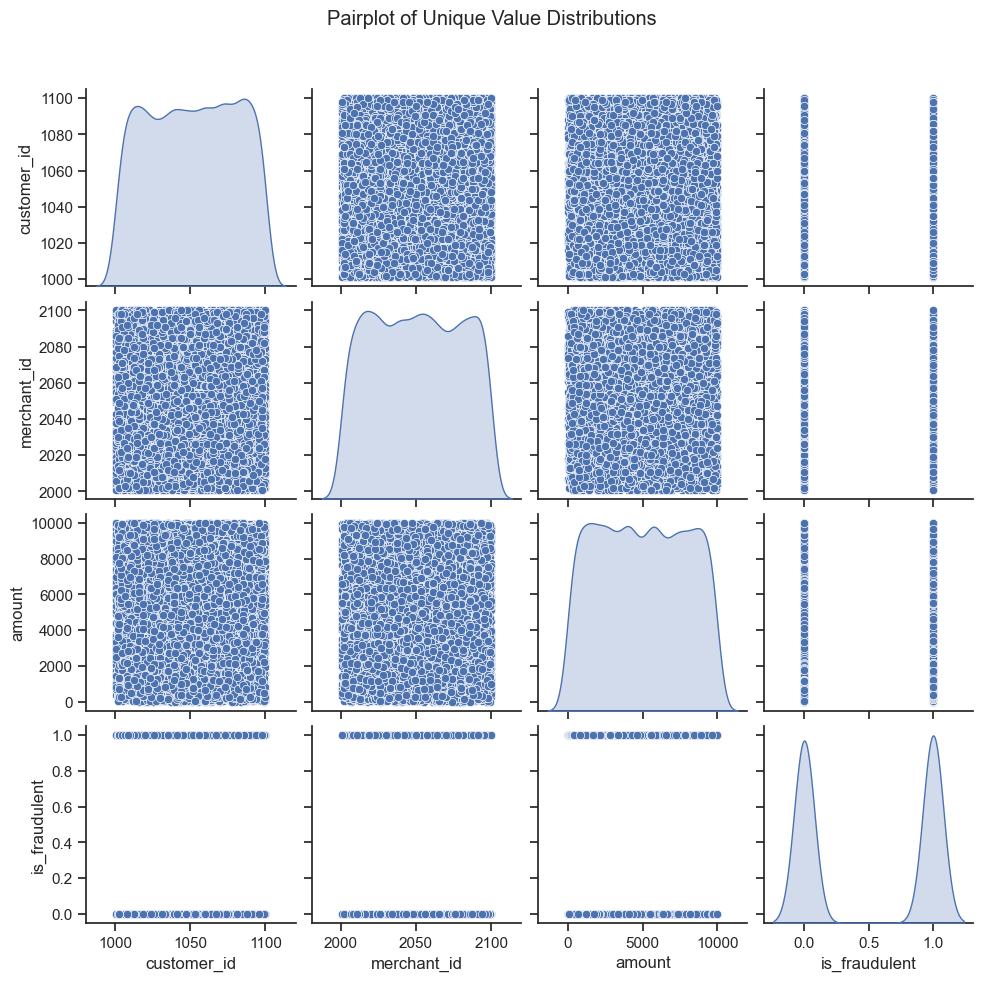

In [177]:
sns.set(style="ticks")
sns.pairplot(df.iloc[:, [1,2,3,4,5,7]], markers="o", diag_kind="kde")

# Adjust the plot layout
plt.subplots_adjust(top=0.9)
plt.suptitle("Pairplot of Unique Value Distributions")

# Show the plot
plt.show()

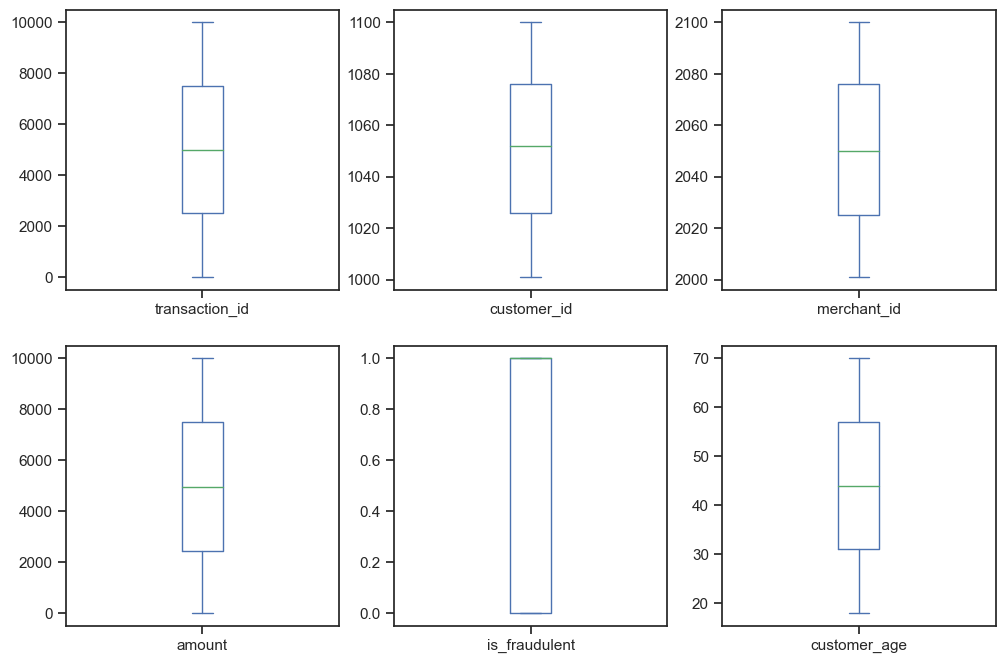

In [178]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

df.plot(kind='box', subplots=True, sharex=False, sharey=False, ax=axes)

plt.show()

The model is pretty well balanced, no need for scaling.

## Data Preparation

In [179]:
# Convert transaction_time into datetime
#df['transaction_time'] = pd.to_datetime(df['transaction_time'])
#df['transaction_time'].info()

In [181]:
# One-hot encoding
df1 = pd.get_dummies(df, columns=['card_type'], prefix=['card'])
df1 = pd.get_dummies(df1, columns=['purchase_category'], prefix=['purchase'])
df1 = pd.get_dummies(df1, columns=['location'], prefix=['loc'])
df1 = pd.get_dummies(df1, columns=['transaction_description'], prefix=['type'])

# Conerting "transaction_time" from datetime64 to int64
#df1["transaction_time"] = df1["transaction_time"].astype("int64") // 10**9
df1

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,customer_age,card_American Express,card_Discover,card_MasterCard,...,type_Purchase at Merchant-2091,type_Purchase at Merchant-2092,type_Purchase at Merchant-2093,type_Purchase at Merchant-2094,type_Purchase at Merchant-2095,type_Purchase at Merchant-2096,type_Purchase at Merchant-2097,type_Purchase at Merchant-2098,type_Purchase at Merchant-2099,type_Purchase at Merchant-2100
0,1,1082,2027,5758.59,2023-01-01 00:00:00,0,43,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2,1015,2053,1901.56,2023-01-01 00:00:01,1,61,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1004,2035,1248.86,2023-01-01 00:00:02,1,57,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,4,1095,2037,7619.05,2023-01-01 00:00:03,1,59,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,5,1036,2083,1890.10,2023-01-01 00:00:04,1,36,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1056,2023,8935.28,2023-01-01 02:46:35,1,36,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9996,9997,1053,2026,30.15,2023-01-01 02:46:36,0,42,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9997,9998,1041,2034,6333.64,2023-01-01 02:46:37,0,36,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,9999,1009,2019,2837.13,2023-01-01 02:46:38,1,57,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Training and testing

In [182]:
X = df1.iloc[:, [1,2,3] + list(range(6, len(df.columns)))]
y = df1['is_fraudulent']

In [183]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1)

### Model selection

In [184]:
# Logistic Regression (LR)
from sklearn.linear_model import LogisticRegression
# Classification and Regression Trees (CART)
from sklearn.tree import DecisionTreeClassifier
# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
# Linear Discriminant Analysis (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Gaussian Naive Bayes (NB)
from sklearn.naive_bayes import GaussianNB
# Support Vector Machines (SVM)
from sklearn.svm import SVC
# Random Forest (RFC)
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting (GB)
from sklearn.ensemble import GradientBoostingClassifier


models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC', RandomForestClassifier(n_estimators=100, random_state=100)))
models.append(('GB', GradientBoostingClassifier()))

models

[('LR', LogisticRegression(multi_class='ovr', solver='liblinear')),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC(gamma='auto')),
 ('RFC', RandomForestClassifier(random_state=100)),
 ('GB', GradientBoostingClassifier())]

In [185]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=6, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='balanced_accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.496175 (0.014126)
LDA: 0.496261 (0.013017)
KNN: 0.513655 (0.011684)
CART: 0.493487 (0.014041)
NB: 0.488302 (0.016536)
SVM: 0.500397 (0.000722)
RFC: 0.496892 (0.017718)
GB: 0.495890 (0.018456)


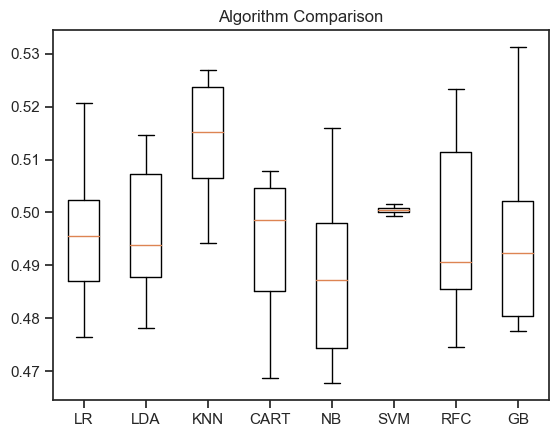

In [186]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

Evaluation results show that K-Nearest Neighbors (KNN) is the best choice, with 51% accuracy. 

In [187]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.511
[[508 489]
 [489 514]]
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       997
           1       0.51      0.51      0.51      1003

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



As it was presented before, prediction accuracy is 51%. If you have any suggestions of how I could improve my models or change the dataset, I'd be happy to hear.